<a href="https://colab.research.google.com/github/Namneet2001/CognitiveAnalysis_project/blob/master/Object_Repositioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python-headless Pillow


In [3]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the images manually


Saving bagpack.jpg to bagpack.jpg
Saving stool.jpeg to stool.jpeg
Saving wall hanging.jpg to wall hanging.jpg



Processing: wall hanging


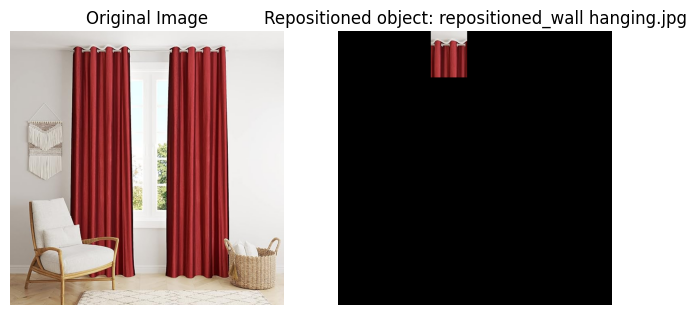

Repositioned image saved to 'repositioned_wall hanging.jpg'.

Processing: stool


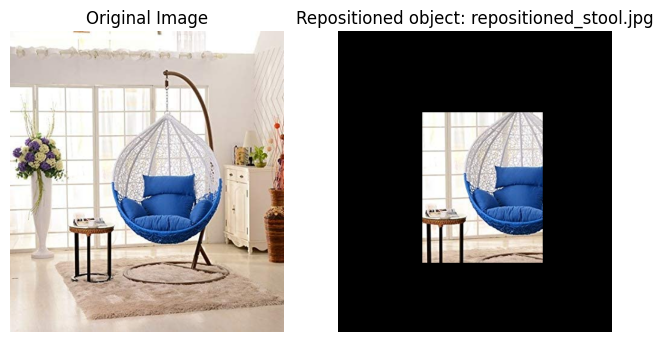

Repositioned image saved to 'repositioned_stool.jpg'.

Processing: backpack


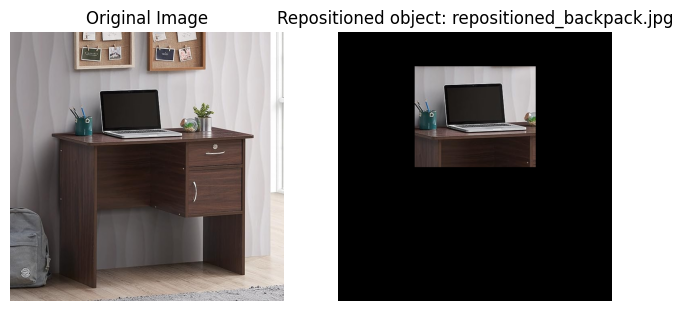

Repositioned image saved to 'repositioned_backpack.jpg'.


In [11]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

def reposition_object(image_path, final_mask, shift_x, shift_y, output_path):
    """
    Repositions the object in the image based on the given mask and pixel shift values.
    """
    # Load the image
    image = np.array(Image.open(image_path).convert("RGB"))

    # Ensure final_mask is a valid NumPy array
    if not isinstance(final_mask, np.ndarray):
        print("Error: final_mask is not a valid NumPy array.")
        return

    # Extract the object from the image using the mask
    object_image = cv2.bitwise_and(image, image, mask=final_mask.astype(np.uint8))

    # Create a blank background to place the object on
    background = np.zeros_like(image)

    # Define the translation matrix for repositioning
    translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])

    # Translate the object in the image
    shifted_object = cv2.warpAffine(object_image, translation_matrix, (image.shape[1], image.shape[0]))

    # Remove the object from its original position by masking it out
    background[final_mask == 255] = 0  # Setting masked area in the background to black

    # Add the shifted object to the background
    final_image = cv2.add(background, shifted_object)

    # Convert the result back to a PIL image and save it
    output_image = Image.fromarray(final_image)
    output_image.save(output_path)

    # Display the result
    plt.imshow(final_image)
    plt.title(f"Repositioned object: {output_path}")
    plt.axis('off')
    plt.show()

    print(f"Repositioned image saved to '{output_path}'.")


# Utility function to display the original image, mask, and final repositioned image
def display_images(image_path, mask, output_path, shift_x, shift_y):
    """
    Helper function to display the original image, mask, and repositioned image.
    """
    # Display original image
    original_image = np.array(Image.open(image_path).convert("RGB"))
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')

    # Display mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis('off')

    # Run repositioning and display repositioned image
    reposition_object(image_path, mask, shift_x, shift_y, output_path)


# Load uploaded images
uploaded_files = {
    "wall hanging": 'wall hanging.jpg',
    "stool": 'stool.jpeg',
    "backpack": 'bagpack.jpg'
}

# Process each uploaded image to create masks dynamically based on image size
masks = {}
output_paths = {}
shifts = {}

for obj_name, image_file in uploaded_files.items():
    # Load the image to get its dimensions
    image = Image.open(image_file)
    width, height = image.size

    # Create a mask with the same dimensions
    mask = np.zeros((height, width), dtype=np.uint8)  # Mask of the same size as the image
    masks[obj_name] = mask

    # Specify mask regions for each object (you will need to adjust these)
    if obj_name == "wall hanging":
        mask[0:130, 190:280] = 255  # Adjust the coordinates for the wall hanging
    elif obj_name == "stool":
        mask[150:400, 100:300] = 255  # Adjust the coordinates for the stool
    elif obj_name == "backpack":
        mask[100:350, 150:450] = 255  # Adjust the coordinates for the backpack

    # Store output paths and shifts
    output_paths[obj_name] = f'repositioned_{obj_name}.jpg'
    shifts[obj_name] = (40, -15)  # Change these as necessary

# Process each image and display results
for obj_name in uploaded_files:
    print(f"\nProcessing: {obj_name}")
    display_images(uploaded_files[obj_name], masks[obj_name], output_paths[obj_name], *shifts[obj_name])


In [10]:
import numpy as np
import cv2
from PIL import Image

def create_mask(image_path, coordinates):
    """
    Create a mask for the specified coordinates in the image.
    """
    # Load the image
    image = np.array(Image.open(image_path).convert("RGB"))

    # Create a blank mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Define the rectangle coordinates for the mask
    x1, y1 = coordinates[0]
    x2, y2 = coordinates[1]

    # Fill the mask with white in the rectangle area
    mask[y1:y2, x1:x2] = 255

    return mask

def reposition_object(image_path, final_mask, shift_x, shift_y, output_path):
    """
    Repositions the object in the image based on the given mask and pixel shift values.
    """
    # Load the image
    image = np.array(Image.open(image_path).convert("RGB"))

    # Ensure final_mask is a valid NumPy array
    if not isinstance(final_mask, np.ndarray):
        print("Error: final_mask is not a valid NumPy array.")
        return

    # Extract the object from the image using the mask
    object_image = cv2.bitwise_and(image, image, mask=final_mask.astype(np.uint8))

    # Create a blank background to place the object on
    background = np.zeros_like(image)

    # Define the translation matrix for repositioning
    translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])

    # Translate the object in the image
    shifted_object = cv2.warpAffine(object_image, translation_matrix, (image.shape[1], image.shape[0]))

    # Create a mask for the original position
    original_mask = np.zeros_like(final_mask)
    original_mask[final_mask == 255] = 255  # Set original position to white

    # Remove the object from its original position by masking it out
    background[original_mask == 255] = 0  # Setting masked area in the background to black

    # Add the shifted object to the background
    final_image = cv2.add(background, shifted_object)

    # Convert the result back to a PIL image and save it
    output_image = Image.fromarray(final_image)
    output_image.save(output_path)
    print(f"Repositioned image saved to '{output_path}'.")

# Define coordinates for each object
coordinates_wall_hanging = [(0, 130), (190, 280)]  # Wall Hanging coordinates
coordinates_bagpack = [(380, 320), (510, 440)]      # Bagpack coordinates
coordinates_stool = [(150, 310), (240, 390)]        # Stool coordinates

# Create masks for each object
mask_wall_hanging = create_mask('wall hanging.jpg', coordinates_wall_hanging)
mask_bagpack = create_mask('bagpack.jpg', coordinates_bagpack)
mask_stool = create_mask('stool.jpeg', coordinates_stool)

# Example usage of reposition_object
shift_x = 50  # Shift right by 50 pixels
shift_y = -20  # Shift up by 20 pixels

# Reposition each object and save the output images
reposition_object('wall hanging.jpg', mask_wall_hanging, shift_x, shift_y, 'repositioned_wall_hanging.jpg')
reposition_object('bagpack.jpg', mask_bagpack, shift_x, shift_y, 'repositioned_bagpack.jpg')
reposition_object('stool.jpeg', mask_stool, shift_x, shift_y, 'repositioned_stool.jpg')

 print(f"\nProcessing: {obj_name}")
    display_images(/content/repositioned_wall_hanging.jpg)

Repositioned image saved to 'repositioned_wall_hanging.jpg'.
Repositioned image saved to 'repositioned_bagpack.jpg'.
Repositioned image saved to 'repositioned_stool.jpg'.
